In [3]:
import yfinance as yf
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [4]:
stock = ['DBK.DE']

stock_df = yf.download(stock,start='2019-01-01',end='2020-12-31',progress = False)

In [7]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,7.070,7.185,6.836,7.149,6.475193,16731014
2019-01-03,7.069,7.289,7.026,7.098,6.428999,12433219
2019-01-04,7.200,7.450,7.170,7.436,6.735142,16572099
2019-01-07,7.507,7.593,7.405,7.551,6.839303,12091778
2019-01-08,7.596,7.799,7.571,7.623,6.904517,14390276
...,...,...,...,...,...,...
2020-12-22,8.630,8.827,8.620,8.786,8.095821,6648941
2020-12-23,8.751,8.983,8.712,8.983,8.277346,8711095
2020-12-28,9.150,9.249,9.075,9.218,8.493886,8988834


Text(0.5, 1.0, 'Deutsche Bank - Stock Prices')

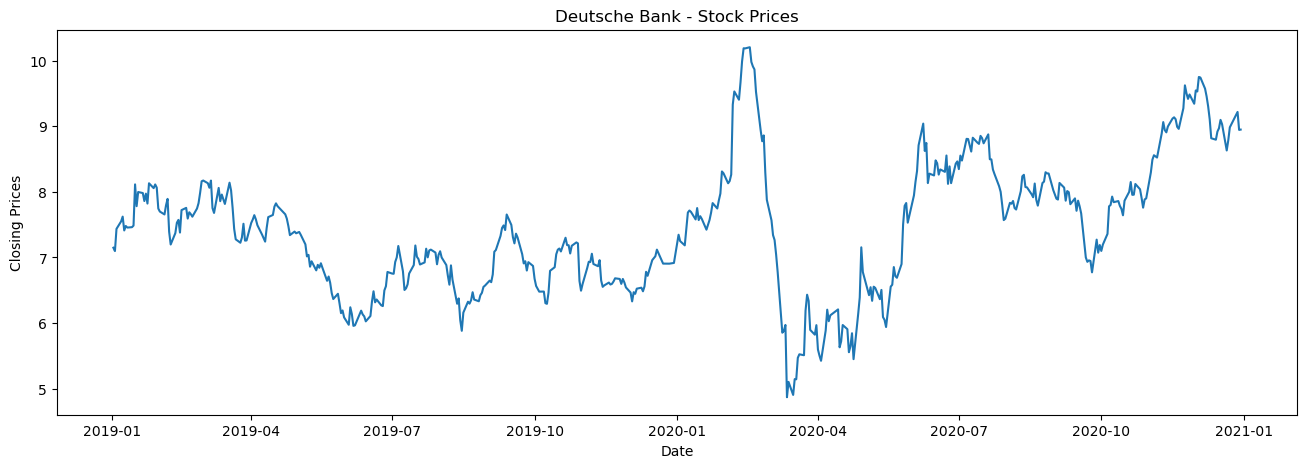

In [6]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(stock_df.index, stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Deutsche Bank - Stock Prices')

Text(0, 0.5, 'Correlation')

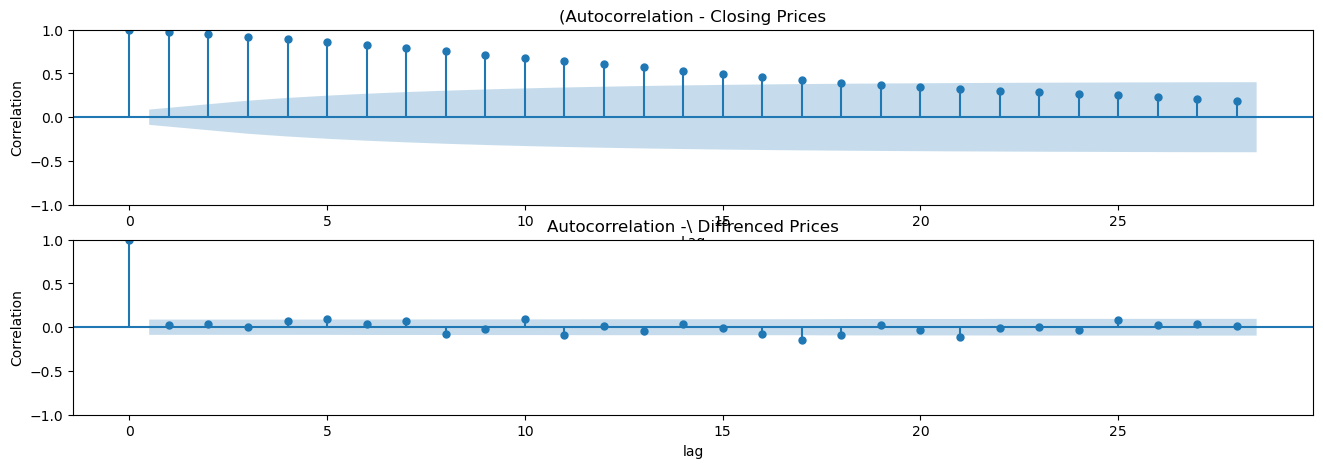

In [11]:
fig, axes = plt.subplots(2,1, \
    figsize =(16,5), dpi = 100)

plot_acf(stock_df.Close, alpha =0.05, ax=axes[0],\
    title = '(Autocorrelation - Closing Prices')

axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')

plot_acf(stock_df.Close.diff().dropna(), \
    alpha=0.05, ax = axes[1], \
        title = 'Autocorrelation -\ Diffrenced Prices')
axes[1].set_xlabel('lag')
axes[1].set_ylabel('Correlation')

In [12]:
resultADF = adfuller(stock_df.Close, \
    regression='n', regresults=True)

print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])

for key, value in resultADF[2].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic: 0.008459
p-value: 0.687086
	1% : -2.570
	5% : -1.942
	10% : -1.616


In [14]:
resultADF

(0.008458531695494804,
 0.6870864347332082,
 {'1%': -2.5703462579848124,
  '5%': -1.941565457910029,
  '10%': -1.61628584384074},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d2f895d5d0>)

In [15]:
resultADF = adfuller(stock_df.Close.diff().dropna(), \
    regression='n', regresults=True)

In [16]:
print('ADF Statistic: %f' % resultADF[0])
print('p-value: %f' % resultADF[1])

for key, value in resultADF[2].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic: -6.432558
p-value: 0.000000
	1% : -2.570
	5% : -1.942
	10% : -1.616


In [17]:
resultADF

(-6.432557955899924,
 1.093930869835976e-09,
 {'1%': -2.5703462579848124,
  '5%': -1.941565457910029,
  '10%': -1.61628584384074},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1d2f8957110>)